# Learning outcomes
Different types of image segmentation techniques
- Clustering based
    - k-means clustering
- Anisotropic image segmentation
- Region based
    - Watershed transformation

In [1]:
!pip install requests

In [16]:
import os
print(os.getcwd())
import sys
sys.path.append('C:\\users\\asus\\anaconda3\\lib\\site-packages\\util_func')

C:\Users\Asus\Desktop\Mini Project\OneDrive_2023-08-15\week 9


In [9]:
import os
import sys
util_func_path = os.path.join('C:', 'users', 'asus', 'anaconda3', 'lib', 'site-packages', 'util_func')
sys.path.append(util_func_path)

In [21]:
def show_img(window_name, img):
    cv.imshow(window_name, img)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [12]:
def plt_img(img, title=''):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [13]:
import sys
sys.executable
!C:\\Users\\Asus\\anaconda3\\python.exe -m pip install util-func

In [24]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from util_func import *

ModuleNotFoundError: No module named 'util_func'

# Simple demo of k-means clustering

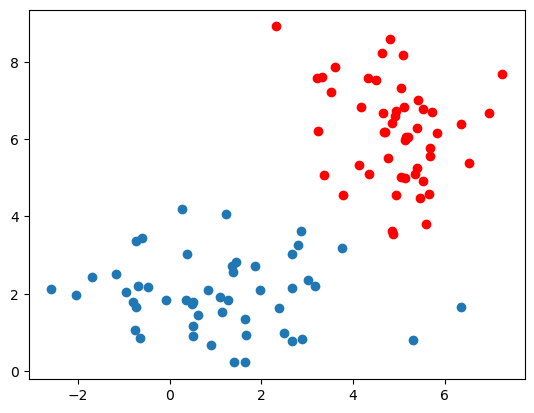

In [10]:
# define bivariate Gaussian distribution function and sample
mean1 = (1, 2)
cov1 = np.array([[2,0], [0,1]])
dat1 = np.random.multivariate_normal(mean1, cov1, size=50)

# cluster 2
mean2 = (5, 6)
cov2 = np.array([[1,0], [0,2]])
dat2 = np.random.multivariate_normal(mean2, cov2, size=50)

plt.scatter(dat1[:, 0], dat1[:, 1])
plt.scatter(dat2[:, 0], dat2[:, 1], c="r")
plt.show()

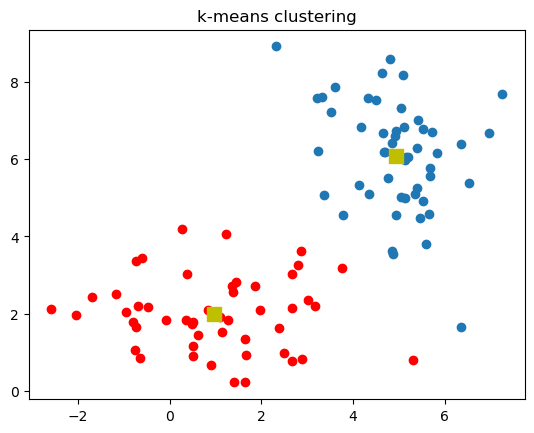

In [11]:
# kmeans clustering : sklearn, cv
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0) # 10 = max iteration

# input data should be float32
data = np.vstack((dat1, dat2))
Z = np.float32(data)
ret, label, center = cv.kmeans(Z, 2, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# subset the data with label
A = Z[label.ravel() == 0]
B = Z[label.ravel() == 1]

plt.scatter(A[:, 0], A[:, 1])
plt.scatter(B[:, 0], B[:, 1], c="r")
plt.scatter(center[:, 0], center[:, 1], c ="y", s=88, marker="s")
plt.title("k-means clustering")
plt.show()

In [12]:
np.unique(label)

array([0, 1], dtype=int32)

In [13]:
label.shape

(100, 1)

# Demo of color image (k-means clustering)

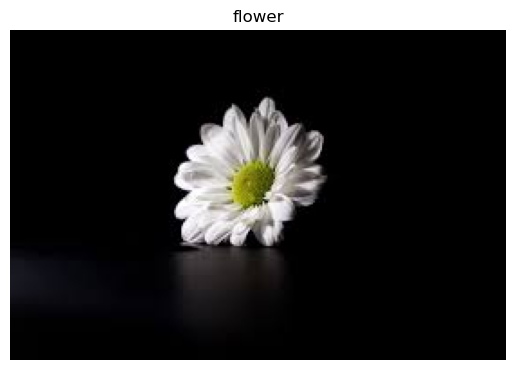

In [14]:
img = cv.imread("images/flower.jfif")
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)


plt_img(img_rgb, "flower")

In [15]:
def k_means_clust(img, K, max_iter=10, eps=1.0, attempts=10, flag=cv.KMEANS_PP_CENTERS):
    """Args
    img: color image (3 channel)
    K = number of clusters
    By default, max_iter=10, eps=1, attempts=10, k-means++"""
    img = img.reshape((-1, 3))
    img = np.float32(img)
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, max_iter, eps) 
    return cv.kmeans(img, K, None, criteria, attempts, flag)


ret, label, center = k_means_clust(img_rgb, 3)

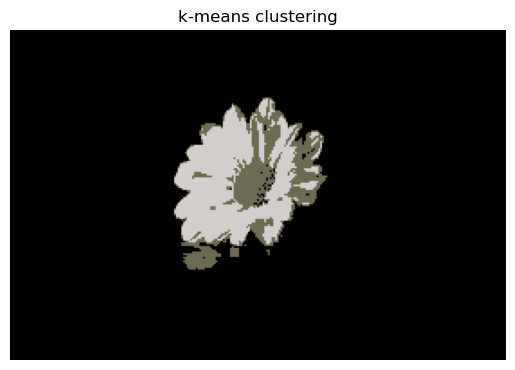

In [16]:
# propagate center back into the image
center = np.uint8(center)

res= center[label.flatten()]
quant = res.reshape(img_rgb.shape)

plt_img(quant, "k-means clustering")

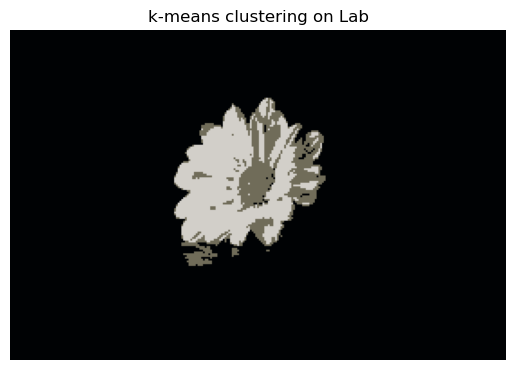

In [17]:
# lab because of perceptual uniformity
img_lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)

ret, label, center = k_means_clust(img_lab, 3)

center = np.uint8(center)

res= center[label.flatten()]
quant = res.reshape(img_rgb.shape)

#change from lab to rgb
quant_rgb = cv.cvtColor(quant, cv.COLOR_Lab2RGB)
plt_img(quant_rgb, "k-means clustering on Lab")

# Anisotropic segmentation

In [18]:
def calcGST(inputIMG, w):
     img = np.float32(inputIMG)

     # Gradient structure tensor components
     imgDiffX = cv.Scharr(img, cv.CV_32F, 1, 0)
     imgDiffY = cv.Scharr(img, cv.CV_32F, 0, 1)
    
     imgDiffXY = cv.multiply(imgDiffX, imgDiffY)
     imgDiffXX = cv.multiply(imgDiffX, imgDiffX)
     imgDiffYY = cv.multiply(imgDiffY, imgDiffY)
    
     J11 = cv.boxFilter(imgDiffXX, cv.CV_32F, (w, w))
     J22 = cv.boxFilter(imgDiffYY, cv.CV_32F, (w, w))
     J12 = cv.boxFilter(imgDiffXY, cv.CV_32F, (w, w))

        # eigenvalue
     tmp1 = J11+J22
     tmp2 = J11-J22
     tmp2 = cv.multiply(tmp2, tmp2)
     tmp3 = cv.multiply(J12, J12)
     tmp4 = np.sqrt(tmp2 + 4.0*tmp3)

     lambda1 = 0.5*(tmp1+tmp4)
     lambda2 = 0.5*(tmp1 - tmp4)

        # coherency
     imgCoherencyOut = cv.divide(lambda1-lambda2, lambda1+lambda2)

        # orientation calculation
     imgOrientationOut = cv.phase(J22-J11, 2.0*J12, angleInDegrees = True)
     imgOrientationOut = 0.5*imgOrientationOut

        return imgCoherencyOut, imgOrientationOut

You can use 'cv.Gaussian()' in line 18-20, instead of 'cv.boxFilter()'. but you have to keep in mind of the zero division problem in line 36. Add small constant on denominator

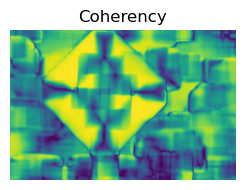

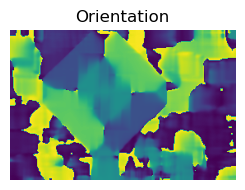

NameError: name 'plt_show' is not defined

In [19]:
# visualize coherency and orientation map
img = cv.imread("images/traffic_sign.jfif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray, (5,5), 0)

W=25
imgCoherency, imgOrientation = calcGST(blur, W)

#normalize coherency and orientation
imgCoherency_norm = cv.normalize(imgCoherency, None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)

imgOrientation_norm = cv.normalize(imgOrientation, None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)

plt.subplot(121), plt_img(imgCoherency_norm, "Coherency")
plt.subplot(122), plt_img(imgOrientation_norm, "Orientation")
plt_show()

In [24]:
#set up trackbars that control threshold for coherency and orientation map
def nothing(x):
    pass

wn="Anisotropic segmentation"
cv.namedWindow(wn, cv.WINDOW_NORMAL | cv.WINDOW_FREERATIO)
cv.createTrackbar("Coherency threshold 1",wn, 50, 100, nothing)
cv.createTrackbar("Coherency threshold 2",wn, 70, 100, nothing)
cv.createTrackbar("Orientation threshold 1",wn, 50, 100, nothing)
cv.createTrackbar("Orientation threshold 2",wn, 100, 100, nothing)

img = cv.imread("images/traffic_sign.jfif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray, (5,5), 0)

# computation of GST
W = 27
imgCoherency, imgOrientation = calcGST(blur, W)

while (1):
    th_C_1 = cv.getTrackbarPos("Coherency threshold 1", wn) * 0.01
    th_C_2 = cv.getTrackbarPos("Coherency threshold 2", wn) * 0.01
    th_Or_1 = cv.getTrackbarPos("Orientation threshold 1", wn)
    th_Or_2 = cv.getTrackbarPos("Orientation threshold 2", wn)
    
    # perform thresholding
    imgBin_C_1 = cv.threshold(imgCoherency, th_C_1, 255, cv.THRESH_BINARY)[1]
    imgBin_C_2 = cv.threshold(imgCoherency, th_C_2, 255, cv.THRESH_BINARY_INV)[1]
    imgBin_Or_1 = cv.threshold(imgOrientation, th_Or_1, 255, cv.THRESH_BINARY)[1]
    imgBin_Or_2 = cv.threshold(imgOrientation, th_Or_2, 255, cv.THRESH_BINARY_INV)[1]
    
    # merge pairs of coherency binary and orientation binary
    imgBin_C = cv.bitwise_and(imgBin_C_1, imgBin_C_2)
    imgBin_Or = cv.bitwise_and(imgBin_Or_1, imgBin_Or_2)
    
    # final mask
    imgBin = cv.bitwise_and(imgBin_C, imgBin_Or)
    
    # print segmentation results
    mask - imgBin != 0
    res = img*(mask[:, :, None].astype(np.uint8))
    cv.imshow(wn, res)
    cv.imshow("segmentation mask", imgBin)
    
    k=cv.waitKey(1) & 0xFF
    if k == 27:
        break

cv.destroyAllWindows()

NameError: name 'mask' is not defined

## watershed segmentation on traffic sign images

In [27]:
img = cv.imread("images/traffic_sign.jfif")
show_img("img", img)

In [29]:
# gaussian blurring
blur = cv.GaussianBlur(img, (5,5), 0)

# mean shift segmentation
blur = cv.pyrMeanShiftFiltering(blur, 15, 28, maxLevel=2)

show_img("mean shift", blur)

In [30]:
# grayscale
gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

# morphological gradient (edge, local, maximum)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (11, 11))
loc_grad = cv.morphologyEx(gray, cv.MORPH_GRADIENT, kernel, iterations = 2)

show_img("gradient", loc_grad)

In [32]:
#import libraries
from scipy import ndimage as ndi # label marker
from skimage.segmentation import watershed

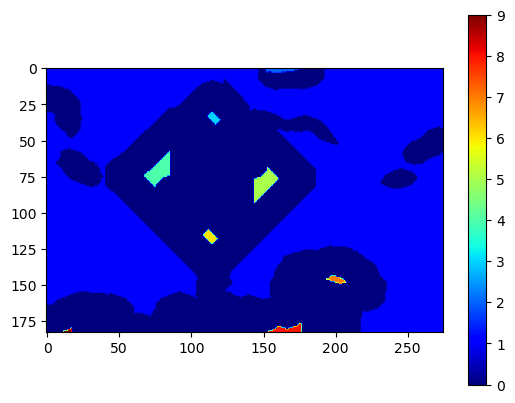

In [44]:
# th
th = loc_grad< 80 #boolean
s = np.ones((3,3), dtype=int)
marker = ndi.label(th, structure=s)[0]

plt.imshow(marker, cmap="jet")
plt.colorbar()
plt.show()


In [36]:
# topographic surface
edge = cv.Canny(gray, 250, 500)

labels = watershed(edge, marker)
np.unique(labels, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([40415,   279,  1208,  2342,  2296,  1250,  1112,  1024,   399],
       dtype=int64))

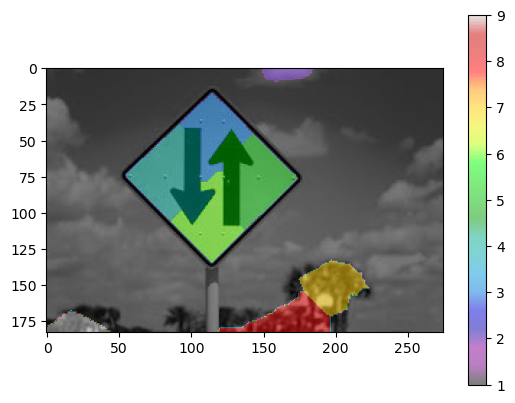

In [43]:
gray_ori = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(gray_ori, cmap="gray")
plt.imshow(labels, cmap=plt.cm.nipy_spectral, alpha=0.5)
plt.colorbar()
plt.show()

In [46]:
# remove background assumption
label_vec, counts = np.unique(labels, return_counts=True)

label_bg = label_vec[np.argmax(counts)]

mask = 255*np.ones(labels.shape, dtype=np.uint8)

mask[labels==label_bg] = 0

#find contours
contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

#find largest contour
contour = sorted(contours, key=cv.contourArea, reverse=True)[0]

img_copy = img.copy()
cv.drawContours(img_copy, [contour], -1, (0, 255, 0), 2)

show_img("watershed", img_copy)

# another example

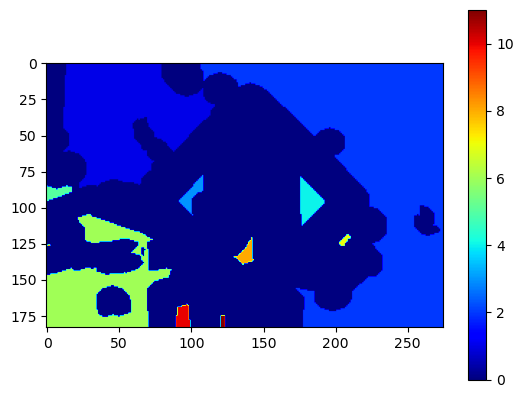

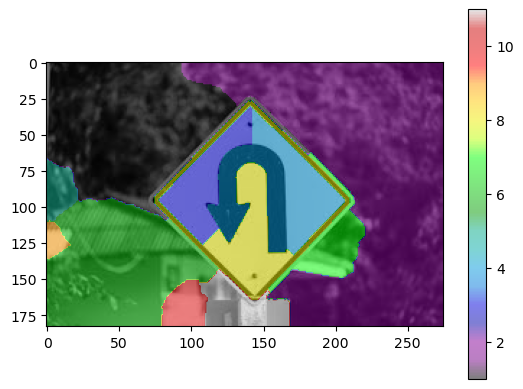

In [56]:
img = cv.imread("images/traffic_sign1.jpg")
show_img("img", img)

# gaussian blurring
blur = cv.GaussianBlur(img, (5,5), 0)

# mean shift segmentation
blur = cv.pyrMeanShiftFiltering(blur, 15, 28, maxLevel=2)

show_img("mean shift", blur)

# grayscale
gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

# morphological gradient (edge, local, maximum)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (11, 11))
loc_grad = cv.morphologyEx(gray, cv.MORPH_GRADIENT, kernel, iterations = 2)

show_img("gradient", loc_grad)

#import libraries
from scipy import ndimage as ndi # label marker
from skimage.segmentation import watershed

# th
th = loc_grad< 80 #boolean
s = np.ones((3,3), dtype=int)
marker = ndi.label(th, structure=s)[0]

plt.imshow(marker, cmap="jet")
plt.colorbar()
plt.show()

# topographic surface
edge = cv.Canny(gray, 250, 500)

labels = watershed(edge, marker)
np.unique(labels, return_counts=True)

gray_ori = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(gray_ori, cmap="gray")
plt.imshow(labels, cmap=plt.cm.nipy_spectral, alpha=0.5)
plt.colorbar()
plt.show()

In [57]:
# remove background assumption
label_vec, counts = np.unique(labels, return_counts=True)

label_bg = label_vec[np.argmax(counts)]

mask = 255*np.ones(labels.shape, dtype=np.uint8)

mask[labels==label_bg] = 0

#find contours
contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

#find largest contour
contour = sorted(contours, key=cv.contourArea, reverse=True)[0]

img_copy = img.copy()
cv.drawContours(img_copy, [contour], -1, (0, 255, 0), 2)

show_img("watershed", img_copy)

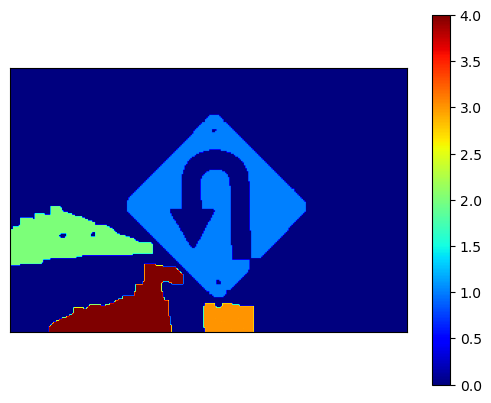

In [58]:
img = cv.imread("images/traffic_sign1.jpg")
(h, w) = img.shape[:2]
blur = cv.GaussianBlur(img, (5, 5), 0)
# Convert to Lab
img_lab = cv.cvtColor(blur, cv.COLOR_BGR2Lab)

img_lab = img_lab.reshape((h*w, 3))
img_lab = np.float32(img_lab)
# criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv.KMEANS_PP_CENTERS

compactness, labels, centers = cv.kmeans(img_lab, 10, None, criteria, 10, flags)

quant = centers.astype(np.uint8)[labels]
quant = quant.reshape((h, w, 3))

bgr = cv.cvtColor(quant, cv.COLOR_Lab2BGR)

show_img("kmeans quantization", bgr)
img_lab[..., 0].min()
6.0
gray = cv.cvtColor(bgr, cv.COLOR_BGR2GRAY)

th = cv.threshold(gray, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)[1]

show_img("threshold", th)
from skimage.feature import peak_local_max
kernel = np.ones((3, 3), dtype=np.uint8)
th = cv.morphologyEx(th, cv.MORPH_OPEN, kernel, iterations=3)

dist_transform = cv.distanceTransform(th, cv.DIST_L2, 3)

coords = peak_local_max(dist_transform, footprint=np.ones((100, 100)), labels=th)

mask = np.zeros(dist_transform.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-dist_transform, markers, mask=th)
plt.imshow(labels, cmap=plt.cm.jet)
plt.colorbar(), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# remove background assumption
label_vec, counts = np.unique(labels, return_counts=True)

label_bg = label_vec[np.argmax(counts)]

mask = 255*np.ones(labels.shape, dtype=np.uint8)

mask[labels==label_bg] = 0

#find contours
contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

#find largest contour
contour = sorted(contours, key=cv.contourArea, reverse=True)[0]

img_copy = img.copy()
cv.drawContours(img_copy, [contour], -1, (0, 255, 0), 2)

show_img("watershed", img_copy)

In [ ]:
img_copy = img.copy()

x,y,w,h = cv.boundingRect(contour)
cv.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)

show_img("bounding box", img_copy)